In [ ]:
%matplotlib inline

# Assignment 1

**DUE: Sunday October 10 at 11:59pm**

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Runtime→→Restart runtime) and then run all cells (in the menubar, select Runtime→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [ ]:
NAME = "Abdelrahman Alnajjar"
STUDENT_ID = "*******"

## Problem 1 -  Use of List Comprehensions

### a) Use list comprehensions to create a list of all the indices of the 2's in the *number_list* you randomly generate (numbers between 1 and 10). (1 point)

In [ ]:
from numpy.random import randint, seed

# Set the seed so the same random numbers will be generated.
seed(42)   # DON'T CHANGE

### YOUR CODE HERE ###

# using List Comprehensions random list generating 
number_list = [randint(0,10) for i in range(10) ]
print(number_list)

# using List Comprehensions to get the indecies of the 2's in the above random list
twoIndecies = [i for i in range(len(number_list)) if number_list[i]==2]
print(twoIndecies)


[6, 3, 7, 4, 6, 9, 2, 6, 7, 4]
[6]


### b) Generate a list of the sum of the numbers that come up when a pair of dice is cast 22 times. Find the mean and standard deviation of these numbers. (3 points)

In [ ]:
from numpy import mean, std

seed(117)   # DON'T CHANGE

### YOUR CODE HERE ###

# sums is a randomly generated list from the sum of pair of dice cast 22 times
sums = [randint(1,7) + randint(1,7) for i in range(22)]

print('mean =', mean(sums), '    std =', std(sums))

mean = 6.681818181818182     std = 2.669463065459277


### c) Generate a list of the sum of the numbers that come up when a pair of dice is cast 100000 times. Find the mean and standard deviation of these numbers. (3 points)

In [ ]:
seed(111)   # DON'T CHANGE

### YOUR CODE HERE ###
# sums is a randomly generated list from the sum of pair of dice cast 100000 times
sums = [randint(1,7) + randint(1,7) for i in range(100000)]
print('mean =', mean(sums), '    std =', std(sums))

mean = 7.02026     std = 2.4131285776767055


### d) Write down your conclusion from the observations you made in this question. (6 points)

Answer: List Comprehension in Python given the ability to go throught a loop and make a list in a single line instead of makeing a for loop and using the append() function. 

## Problem 2 - Data Processing on Heart Disease Data

When a data scientist first encounters a new dataset, the first step is data exploration. The dataset we will be using is derived from the Heart database from the UCI Machine Learning Repository.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### a) Read in the Data (2 points)
We are showing you a way to load data into your Colab file! Just run the next couple of code blocks. You'll have to paste your authorization code at one point...


In [ ]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1qF_Ees7ETr5BiPnHTabyeIH1KQVkViUK"})   # Replace the id with id of file you want to access
downloaded.GetContentFile('Heart.csv')        # Replace the file name with your file

# Finally we can actually read in the data.
data = pd.read_csv('Heart.csv')

# How many rows and columns are in this dataset?

### YOUR CODE HERE ###
# this will tell us the number of columns Number of rows: [306]
# also will tell us the number of rows Number of columns: [15]
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  306 non-null    int64  
 1   Age         306 non-null    int64  
 2   Sex         306 non-null    int64  
 3   ChestPain   306 non-null    object 
 4   RestBP      306 non-null    int64  
 5   Chol        306 non-null    int64  
 6   Fbs         306 non-null    int64  
 7   RestECG     306 non-null    int64  
 8   MaxHR       306 non-null    int64  
 9   ExAng       306 non-null    int64  
 10  Oldpeak     306 non-null    float64
 11  Slope       306 non-null    int64  
 12  Ca          302 non-null    float64
 13  Thal        304 non-null    object 
 14  AHD         306 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 36.0+ KB


Number of rows: [306]

Number of columns: [15]

### b) Using Dataframe functionalities, provide a brief description of the data. The description can include (but not limited to): number of features, data type of each feature, statistics on numerical features, potential data cleaning tasks that needs to be done based on the data. (8 points)  

In [ ]:
### YOUR CODE HERE ###
#data.info()
data.describe()
# Desctibe the data that are not numeric 
#ChestPain, Thal, and AHD have categorical values
#data['ChestPain'].describe()
#data['Thal'].describe()
#data['AHD'].describe()
# might use their One hoe-encoding, and then drop them? 
# do I need to do that? 

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,302.000000
mean,153.500000,54.924837,0.679739,139.267974,246.428105,0.147059,0.986928,150.075163,0.326797,1.113072,1.607843,0.665563
std,88.478811,13.164193,0.467341,133.345625,52.139627,0.354745,0.994984,26.962832,0.469811,1.634994,0.619204,0.935142
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000
25%,77.250000,47.250000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,153.500000,55.500000,1.000000,130.000000,240.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,229.750000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.750000,1.000000,1.600000,2.000000,1.000000
max,306.000000,222.000000,1.000000,2444.000000,564.000000,1.000000,2.000000,293.000000,1.000000,21.200000,3.000000,3.000000


I have a statistical description of the data that I have using data.describe() function  

Also, I have a basic and detailed description of the data, using the function .info() that tells me each columns (feature) info, in addition to their data type like (int64, float64, or and Object like “String”) 

In addition, I included some other functions in order to describe any single feature or column I want. 

I have some null values in which they need to be cleaned out before we use the data, I might also change some of data columns that are of type “Object” since they will not help as much with the leaning process, and for that I could use One-Hot-Encoding technique 



### c) Understanding the Data (12 points)

Look for a data description file whenever you explore a new dataset. This is a codebook (or text file) that tells you what each data item represents. The following link includes the data dictionary for this dataset: [Data Codebook](https://archive.ics.uci.edu/ml/datasets/heart+Disease)

In [ ]:
# Show the first few rows of the data.
### YOUR CODE HERE ###
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
# Print out the "info" of the dataset.
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  306 non-null    int64  
 1   Age         306 non-null    int64  
 2   Sex         306 non-null    int64  
 3   ChestPain   306 non-null    object 
 4   RestBP      306 non-null    int64  
 5   Chol        306 non-null    int64  
 6   Fbs         306 non-null    int64  
 7   RestECG     306 non-null    int64  
 8   MaxHR       306 non-null    int64  
 9   ExAng       306 non-null    int64  
 10  Oldpeak     306 non-null    float64
 11  Slope       306 non-null    int64  
 12  Ca          302 non-null    float64
 13  Thal        304 non-null    object 
 14  AHD         306 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 36.0+ KB


The above output can help you to see how much missing data is in the dataset. How many null values (missing values) exists in the data?

For Row #12 (ca) there are 4 null values,
For Row #13 (Thal)  there are 2 null vlaues

What to do about missing values is very good question. Sometimes one replaces such missing values with the mean of all the values that are present for this variable. But to keep things simple here we will simply delete any rows with missing data.

Use the code cell below to drop null values from the data. [hint: you can use dropna() function]

In [ ]:
# Drop any rows with missing data
### YOUR CODE HERE ###
#data.dropna(inplace=True)  // this droped extra values and made it to 300 values instead of 302!!!
indexes = data[data['Ca'].isnull()].index
data.drop(indexes, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 305
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  302 non-null    int64  
 1   Age         302 non-null    int64  
 2   Sex         302 non-null    int64  
 3   ChestPain   302 non-null    object 
 4   RestBP      302 non-null    int64  
 5   Chol        302 non-null    int64  
 6   Fbs         302 non-null    int64  
 7   RestECG     302 non-null    int64  
 8   MaxHR       302 non-null    int64  
 9   ExAng       302 non-null    int64  
 10  Oldpeak     302 non-null    float64
 11  Slope       302 non-null    int64  
 12  Ca          302 non-null    float64
 13  Thal        300 non-null    object 
 14  AHD         302 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 37.8+ KB


Another useful Pandas dataframe method is describe(). The describe method gives summary statistics for each column, which can help you to identify outliers.

In [ ]:
# The describe method of a Pandas dataframe yields much useful information.
data.describe()
#plt.hist(data.Age,bins=30, rwidth=0.8)
#plt.show()



,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,152.384106,55.019868,0.675497,139.347682,246.827815,0.145695,0.993377,149.980132,0.327815,1.126159,1.609272,0.665563
std,88.267440,13.194920,0.468966,134.225482,52.282044,0.353386,0.994982,27.081756,0.470196,1.641715,0.620508,0.935142
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000
25%,76.250000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.250000,0.000000,0.000000,1.000000,0.000000
50%,151.500000,56.000000,1.000000,130.000000,241.500000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,228.750000,61.000000,1.000000,140.000000,275.750000,0.000000,2.000000,166.000000,1.000000,1.750000,2.000000,1.000000
max,306.000000,222.000000,1.000000,2444.000000,564.000000,1.000000,2.000000,293.000000,1.000000,21.200000,3.000000,3.000000


Outliers are values far from the other data values (the distribution of the data), and are usually typos or other errors (such as measurement error). Looking at the data description above, do you spot any possible outliers in the data?

Yes, one person's age is 222? outlier, or it could be an extra 2 added by mistake. And there could be more

### d) Outlier Detection \& Elimination (15 points)
In this section, We'll remove any ages that are more than 4 standard deviations from the mean.

To accomplish this: 

1) You'll make a new column called AgeZ to hold the z-transformed values of the Age column. 


2) Then, any AgeZ value that's less than -4 or more than 4 should be flagged as an outlier. 


3) Remove those entries from the dataset.

Remember that standardizing the data (or z-transform) is making your data have a zero mean and unit variance. This can be done with:

$$x \to_{stdize}  \frac{x - \mu}{\sigma}$$
Where $\mu$ is your mean and $\sigma$ is your standard deviation.


In [ ]:
f

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,151.877076,54.465116,0.674419,139.312292,247.176080,0.146179,0.996678,150.471761,0.325581,1.120598,1.604651,0.667774
std,87.972807,9.024205,0.469372,134.447594,52.017038,0.353874,0.994982,25.741601,0.469372,1.641597,0.616316,0.935908
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.000000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,151.000000,56.000000,1.000000,130.000000,242.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,228.000000,61.000000,1.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,306.000000,77.000000,1.000000,2444.000000,564.000000,1.000000,2.000000,293.000000,1.000000,21.200000,3.000000,3.000000


Notice that now the Age column is much more reasonable. Report Mean, Standard Deviation, Q1, Q2, and Q3 of the age column before outlier removal and after outlier removal. 

Report Mean, , Q1, Q2, and Q3 of the age column before outlier removal and after outlier removal.
Reporting Standard Deviation Before outlier removal is = 13.164193
Reporting Standard Deviation After outlier removal is = 9.024205

Reporting Q1 Before outlier removal is = 47.250000	
Reporting Q1 Before After removal is = 48.000000

Reporting Q2 Before outlier removal is = 55.500000	
Reporting Q2 Before After removal is = 56.000000

Reporting Q3 Before outlier removal is = 61.000000    
Reporting Q3 Before After removal is = 61.000000



Perform the same process to eliminate any extreme outliers (more than 4 standard deviations away from the mean) for RestBP, MaxHR, and the Oldpeak variables. Delete those exta columns after you have removed the outliers.

In [ ]:
### YOUR CODE HERE ###
# RestBP # MaxHR # Oldpeak
data['RestBPZ'] = ( data.RestBP - data.RestBP.mean() )/data.RestBP.std()
data['MaxHRZ'] = ( data.MaxHR - data.MaxHR.mean() )/data.MaxHR.std()
data['OldpeakZ'] = ( data.Oldpeak - data.Oldpeak.mean() )/data.Oldpeak.std()


# Delete any rows for which ( RestBPZ ,MaxHRZ Or, dpeakZ) is greater than 4 or less than -4.
indexes= data[ (data['RestBPZ'] > 4)  | (data['RestBPZ'] < -4) ].index
data.drop(indexes, inplace=True)

indexes= data[ (data['MaxHRZ'] > 4)  | (data['MaxHRZ'] < -4) ].index
data.drop(indexes, inplace=True)

indexes= data[ (data['OldpeakZ'] > 4)  | (data['OldpeakZ'] < -4) ].index
data.drop(indexes, inplace=True)

# Cleanup - delete the z-tranform column since we don't need it any more.
data = data.drop(columns=['RestBPZ'])
data = data.drop(columns=['MaxHRZ'])
data = data.drop(columns=['OldpeakZ'])


# Leave this for your last line.
data.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,151.471380,54.518519,0.680135,131.612795,247.474747,0.148148,0.996633,149.491582,0.329966,1.032660,1.595960,0.666667
std,87.290096,9.037113,0.467211,17.675803,51.838368,0.355846,0.994914,23.025561,0.470994,1.128131,0.613792,0.929981
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.000000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,151.000000,56.000000,1.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.000000,61.000000,1.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,302.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,3.000000,3.000000


For the columns RestBP, MaxHR, and Oldpeak, report Mean, Standard Deviation, Q1, Q2, and Q3 of the age column before outlier removal and after outlier removal. 


Report Mean, , Q1, Q2, and Q3 of the **age** column before outlier removal and after outlier removal.
Reporting Standard Deviation Before outlier removal is = 9.024205
Reporting Standard Deviation After outlier removal is = 9.037113

Reporting Q1 Before outlier removal is = 48.000000	
Reporting Q1 Before After removal is = 48.000000

Reporting Q2 Before outlier removal is = 56.000000	
Reporting Q2 Before After removal is = 56.000000

Reporting Q3 Before outlier removal is = 61.000000    
Reporting Q3 Before After removal is =61.000000


### e) Data Visualization (4 points)

Sometimes it is useful to look at a pairwise plot of all the variables. Below we do this for all but the first column. Be patient, this takes a minute to complete. Notice that the main diagonal has histogram plots for each variable, which gives you a sense of the distribution of values of each variable.

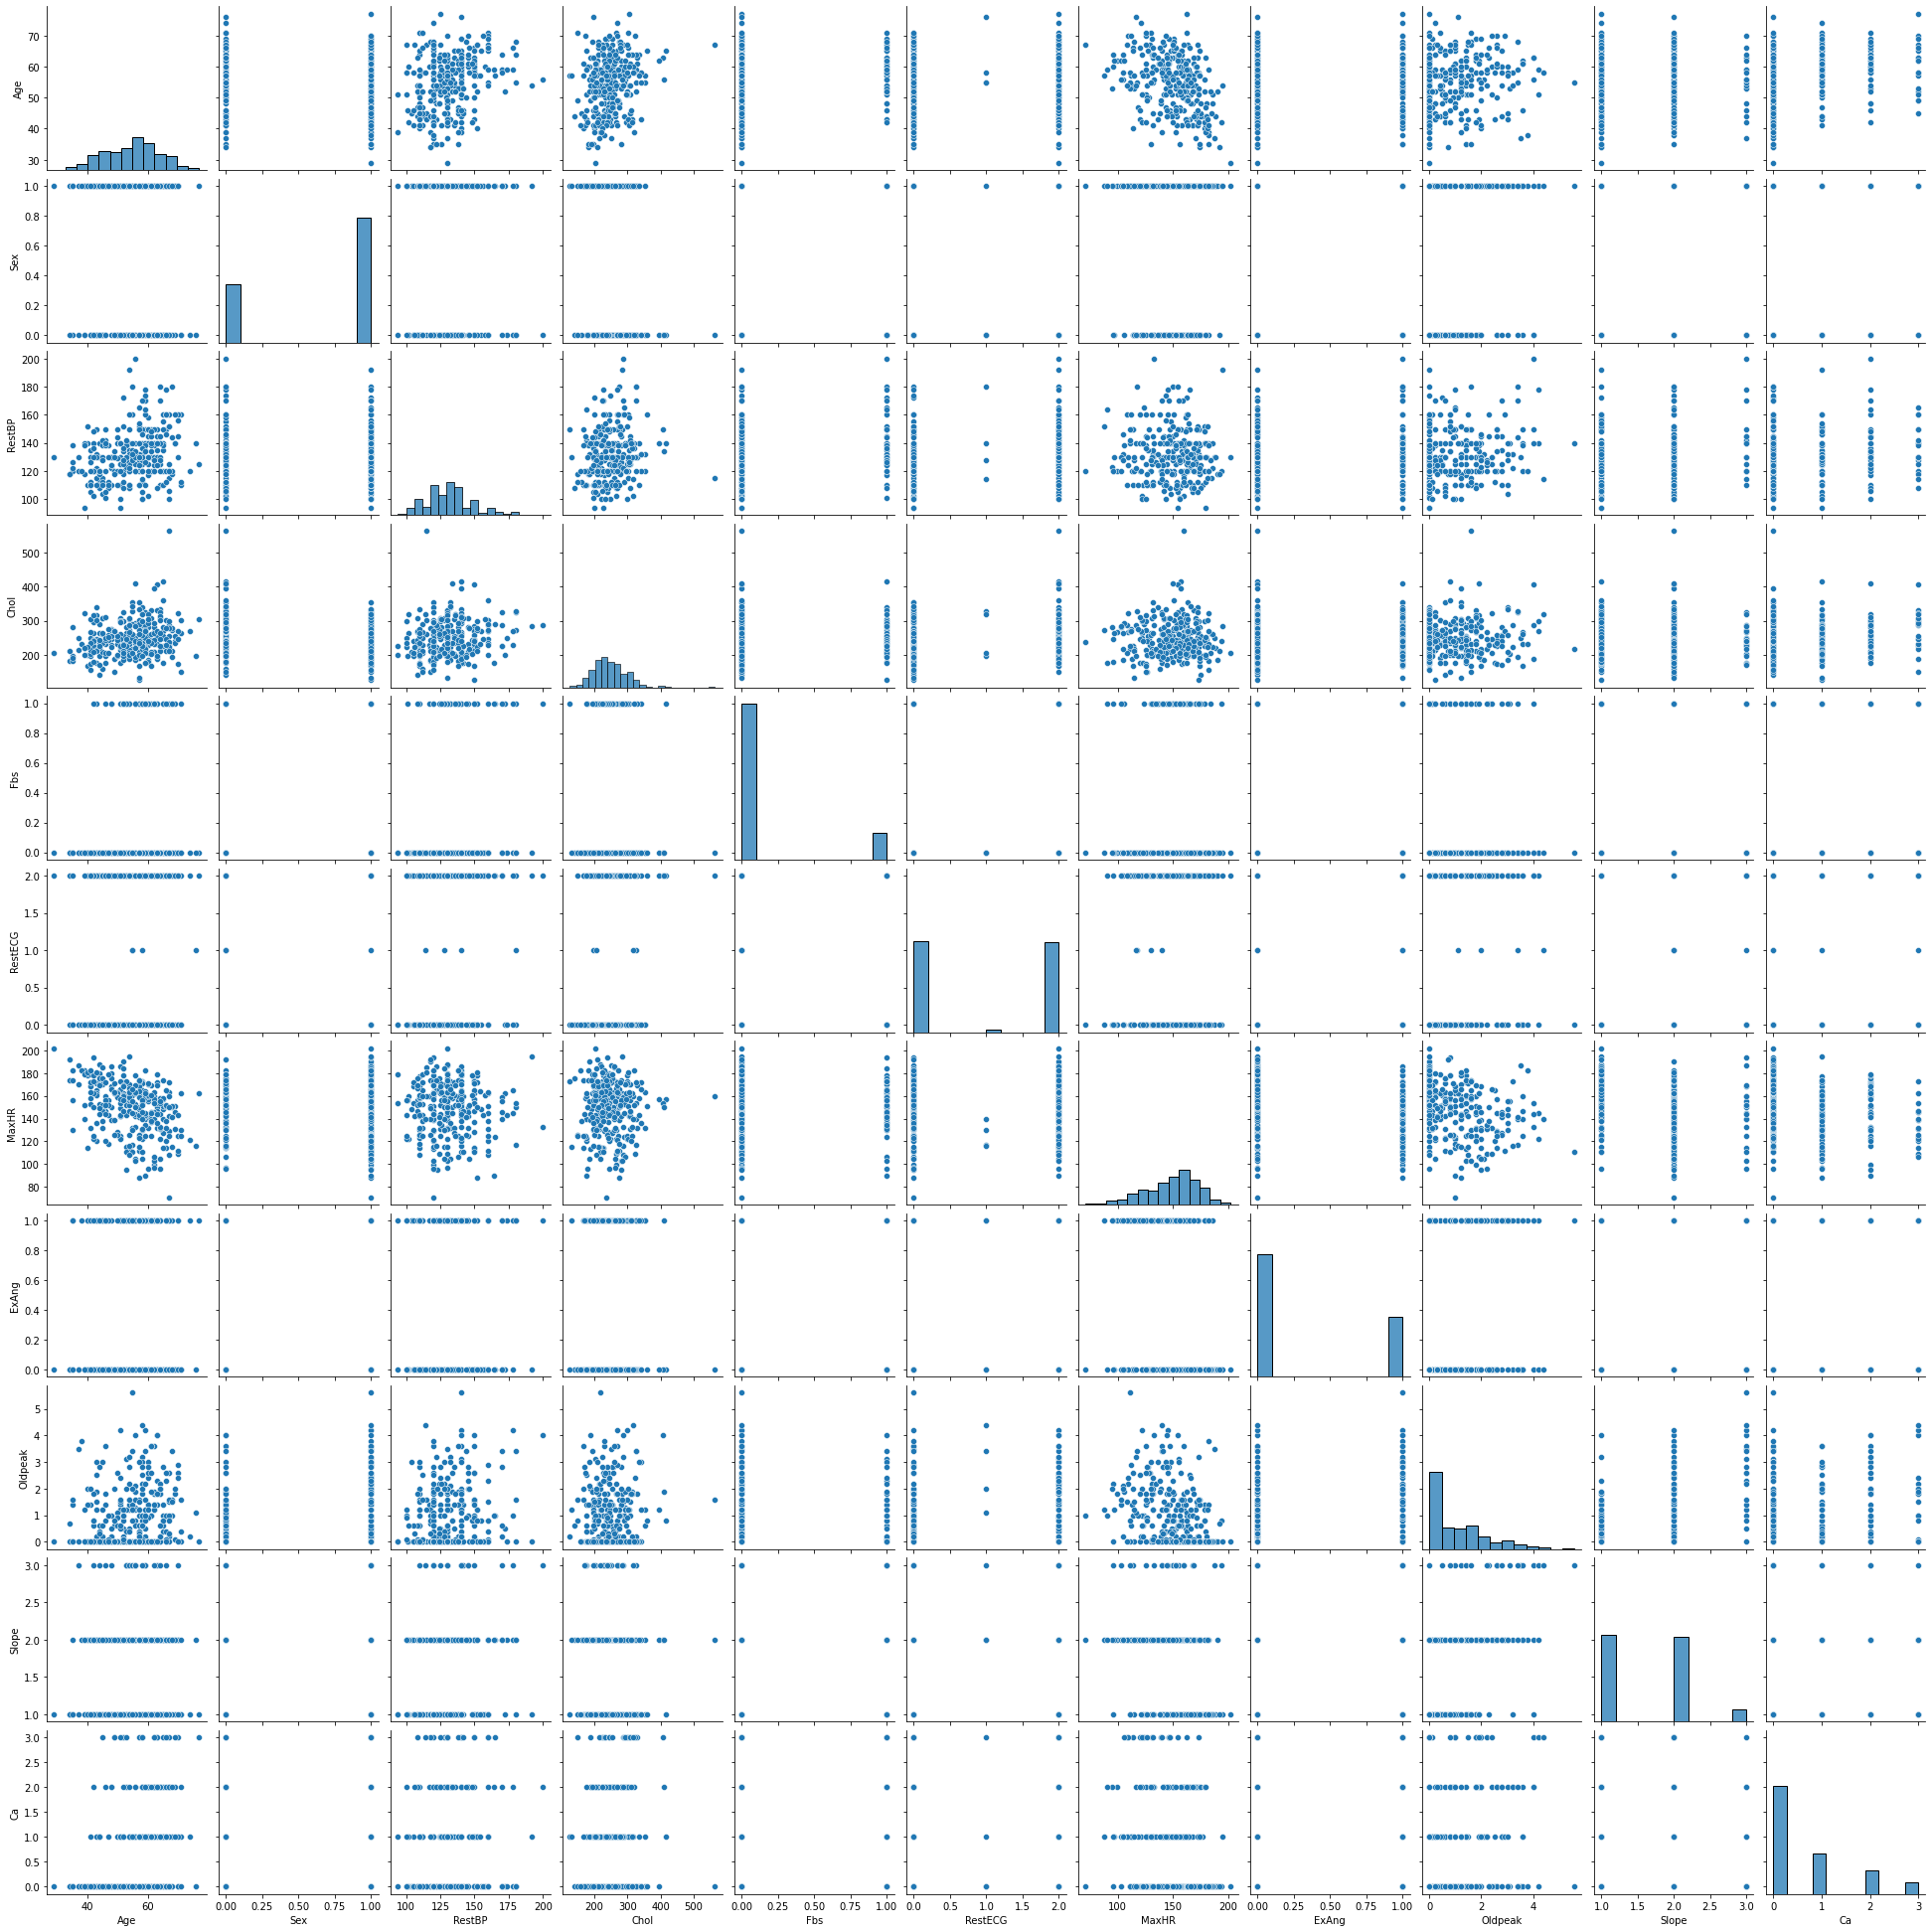

In [ ]:
# Make a pairplot of all the variables (columns), excepting the first column.
plt.rcParams['figure.figsize'] = (15, 15)
sns.pairplot(data.drop(columns='Unnamed: 0'))

Let's look at a larger plot of the patient age distribution for the patients in this dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

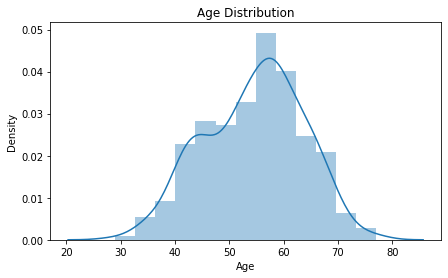

In [ ]:
# Plot the patient age distribution.
plt.rcParams['figure.figsize'] = (7, 4)
sns.distplot(data['Age'])
plt.title('Age Distribution')

Plot the distribution of patient cholesterol levels.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Cholesterol Distribution')

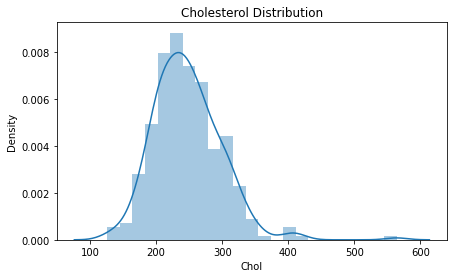

In [ ]:
### YOUR CODE HERE ###
plt.rcParams['figure.figsize'] = (7, 4)
sns.distplot(data['Chol'])
plt.title('Cholesterol Distribution')

### f) Data Normalization (6 points)

We have already seen how the z-transform can be used to rescale values. We used this to help eliminate outliers, but such transforms can also be useful prior to applying machine learning algorithms, and often improves the algorithms performance. 

Another common transform is to map all the variable values into the interval $[0,1]$, via the transform:

$$x \to  \frac{x - \min}{\max - \min}$$

Let's create a new column ('NewAge') mapping all ages into the interval $[0,1]$.

In [ ]:
# Create a new column, NewAge, to hold the normalized Age variable.
data['NewAge'] = (data.Age - data.Age.min())/(data.Age.max() - data.Age.min())

# Take a look at the new age column.
data['NewAge']

0      0.708333
1      0.791667
2      0.791667
3      0.166667
4      0.250000
         ...   
297    0.583333
298    0.333333
299    0.812500
300    0.583333
301    0.583333
Name: NewAge, Length: 297, dtype: float64

In [ ]:
# We don't need this column, so we delete it. (It was just to show you how to do this.)
data = data.drop(columns=['NewAge'])

Map the minimum to 0 and maximum to 1 (in other words, normalize the column) for the RestBP, Chol, and MaxHR columns. Don't create new columns, just replace the existing ones with the transformed data.

In [ ]:
### YOUR CODE HERE ###
data['RestBP'] = (data.RestBP - data.RestBP.min())/(data.RestBP.max() - data.RestBP.min())
data['Chol'] = (data.Chol - data.Chol.min())/(data.Chol.max() - data.Chol.min())
data['MaxHR'] = (data.MaxHR - data.MaxHR.min())/(data.MaxHR.max() - data.MaxHR.min())

# Leave this for your last line.
data.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,151.471380,54.518519,0.680135,0.354838,0.277340,0.148148,0.996633,0.599172,0.329966,1.032660,1.595960,0.666667
std,87.290096,9.037113,0.467211,0.166753,0.118352,0.355846,0.994914,0.175768,0.470994,1.128131,0.613792,0.929981
min,1.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,76.000000,48.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.473282,0.000000,0.000000,1.000000,0.000000
50%,151.000000,56.000000,1.000000,0.339623,0.267123,0.000000,1.000000,0.625954,0.000000,0.800000,2.000000,0.000000
75%,227.000000,61.000000,1.000000,0.433962,0.342466,0.000000,2.000000,0.725191,1.000000,1.600000,2.000000,1.000000
max,302.000000,77.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,5.600000,3.000000,3.000000


### g) Converting Categorical Data to Numeric Values (3 points)

It is frequently useful to convert categorical (non-numeric) values to numeric ones. The last variable in the data frame, AHD, has categorical values 'No' if the patient has no heart disease, and 'Yes' if they do. Convert these values to 0 for 'No' and 1 for 'Yes'.

In [ ]:
### YOUR CODE HERE ###
data['AHD'] = pd.factorize(data.AHD)[0]
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,0.481132,0.244292,1,2,0.603053,0,2.3,3,0.0,fixed,0
1,2,67,1,asymptomatic,0.622642,0.365297,0,2,0.282443,1,1.5,2,3.0,normal,1
2,3,67,1,asymptomatic,0.245283,0.235160,0,2,0.442748,1,2.6,2,2.0,reversable,1
3,4,37,1,nonanginal,0.339623,0.283105,0,0,0.885496,0,3.5,3,0.0,normal,0
4,5,41,0,nontypical,0.339623,0.178082,0,2,0.770992,0,1.4,1,0.0,normal,0





### h) One-Hot-Encoding (10 points)

One-hot-encoding is another often used way of converting categorical data to numeric. For example, instead of the categories 'cold', 'warm', 'hot', we form a seperate column for each of these attributes, so that what was represented as 'cold' is now $[1,0,0]$ and what was 'hot' is now $[0,0,1]$.  There is a built in command for doing this in the **sklearn** package.

Similar to what you have learned from the class exercise of lecture 2, add new columns for one-hot-encoding of 'Thal' column. Use 'Thal' as the prefix. Then drop the original column.

In [ ]:
# Concatentate new one-hot encodings with the original dataframe.
data = pd.concat([data,pd.get_dummies(data['Thal'], prefix='Thal')],axis=1)

# another way
#dummies = pd.get_dummies(data.Thal)
#data = pd.concat([data,dummies],axis='columns')


# Now drop the original 'Thal' column (you don't need it anymore)

### YOUR CODE HERE ###
data = data.drop(columns = ['Thal'])

data.head()


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,Thal_fixed,Thal_normal,Thal_reversable
0,1,63,1,typical,0.481132,0.244292,1,2,0.603053,0,2.3,3,0.0,0,1,0,0
1,2,67,1,asymptomatic,0.622642,0.365297,0,2,0.282443,1,1.5,2,3.0,1,0,1,0
2,3,67,1,asymptomatic,0.245283,0.235160,0,2,0.442748,1,2.6,2,2.0,1,0,0,1
3,4,37,1,nonanginal,0.339623,0.283105,0,0,0.885496,0,3.5,3,0.0,0,0,1,0
4,5,41,0,nontypical,0.339623,0.178082,0,2,0.770992,0,1.4,1,0.0,0,0,1,0


Create a one-hot-encoding for the ChestPain column, just as we did above for the Thal column, deleting the original column as before.

In [ ]:
### YOUR CODE HERE ###
# Concatentate new one-hot encodings with the original dataframe.
data = pd.concat([data,pd.get_dummies(data['ChestPain'], prefix='ChestPain')],axis=1)

# Now drop the original 'ChestPain' column (I don't need it anymore)

### YOUR CODE HERE ###
data = data.drop(columns = ['ChestPain'])

# Leave this for your last line.
data.head()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,Thal_fixed,Thal_normal,Thal_reversable,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical
0,1,63,1,0.481132,0.244292,1,2,0.603053,0,2.3,3,0.0,0,1,0,0,0,0,0,1
1,2,67,1,0.622642,0.365297,0,2,0.282443,1,1.5,2,3.0,1,0,1,0,1,0,0,0
2,3,67,1,0.245283,0.235160,0,2,0.442748,1,2.6,2,2.0,1,0,0,1,1,0,0,0
3,4,37,1,0.339623,0.283105,0,0,0.885496,0,3.5,3,0.0,0,0,1,0,0,1,0,0
4,5,41,0,0.339623,0.178082,0,2,0.770992,0,1.4,1,0.0,0,0,1,0,0,0,1,0


### i) Feature Engineering (7 points)

Feature engineering is central to much of machine learning. Traditionally such features needed to be hand crafted, which is as much an art as it is engineering. One of the huge advantages of neural networks over traditional machine learning techniques is that neural networks can learn optimal features.

Create a new column (feature) called AgeC, which will be the product of the patient's age and the patient's cholesterol level. 

In [ ]:
### YOUR CODE HERE ###
data['AgeC'] = data['Age']*data['Chol']

# Leave this for your last line.
data.head()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,Thal_fixed,Thal_normal,Thal_reversable,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,AgeC
0,1,63,1,0.481132,0.244292,1,2,0.603053,0,2.3,3,0.0,0,1,0,0,0,0,0,1,15.390411
1,2,67,1,0.622642,0.365297,0,2,0.282443,1,1.5,2,3.0,1,0,1,0,1,0,0,0,24.474886
2,3,67,1,0.245283,0.235160,0,2,0.442748,1,2.6,2,2.0,1,0,0,1,1,0,0,0,15.755708
3,4,37,1,0.339623,0.283105,0,0,0.885496,0,3.5,3,0.0,0,0,1,0,0,1,0,0,10.474886
4,5,41,0,0.339623,0.178082,0,2,0.770992,0,1.4,1,0.0,0,0,1,0,0,0,1,0,7.301370


###  j) Balanced or Unbalanced Classes (8 points)

For this dataset, one variable that we might like to predict is the presence of heart disease, the AHD column, using all the other columns. Some datasets are highly imbalanced.  Suppose that 95% of a set of subjects were healthy, with only 5% having heart disease. A machine learning model can attain 95% accuracy by simply ALWAYS predicting no heart disease. It sounds like a fairly accurate model, but it would miss predicting any heart disease! 

There are techniques for dealing with this, but first we have to ascertain if our data is unbalanced. Use the code cell below to see if the data is imbalanced or not and describe your observations in the next text cell.

0    160
1    137
Name: AHD, dtype: int64

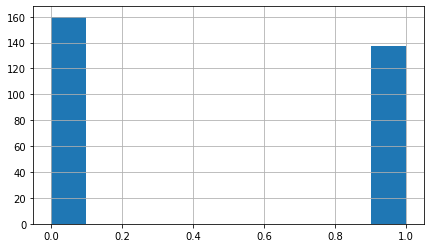

In [ ]:
### YOUR CODE HERE ###
data.AHD.hist()
data.AHD.value_counts()


I can observe that the data for the AHD is actually balanced (not perfectly 50%) based on the histogram, aslo from the value_counts(), we could see the number of 1's and 0's are very close to each, and they are balanced to some degree


 plot above that shows the distributeion of AHD data between 0 and 1, which is the numeric values that we converted to. 

### k) Outline potential solutions to banalnce the data in the next cell, and implement one of those techniques in the code cell that follows. By plotting the distribution or in some other way, indicate how your technique helped create a more balanced dataset. (12 points) 

There are several ways to deal with imbalanced data, among them there is the Under-sampling technique and the is the Over-sampling 
Under-sampling deals with the imbalanced dataset by reducing the size of the larger class, where oversampling does the opposite where it increases the size of rara samples in order to increase the number of datapoints in the smaller class.

I will be useing Random Undersampling, such that the majority class will be reduced so it will have the same proportion as minory class.

In [ ]:
### YOUR CODE HERE ###
from imblearn.under_sampling import NearMiss

columns = data.columns.tolist()
columns = [c for c in columns if c not in ["AHD"]]
target = "AHD"
X = data[columns]
Y = data[target]
from collections import Counter
print(Counter(y_res))


Counter({0: 137, 1: 137})
